# 1. Import Required Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Explore the Dataset

In [7]:
#Loading the dataset to pandas 

salary_data = pd.read_csv('data/Salary_Data.csv.xls')

#Display the first 5 rows
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [11]:
#Check for missing values 
print(salary_data.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


##  3. Observe the Distribution of the current data set with the chosen X, Y Values

Text(0, 0.5, 'salary')

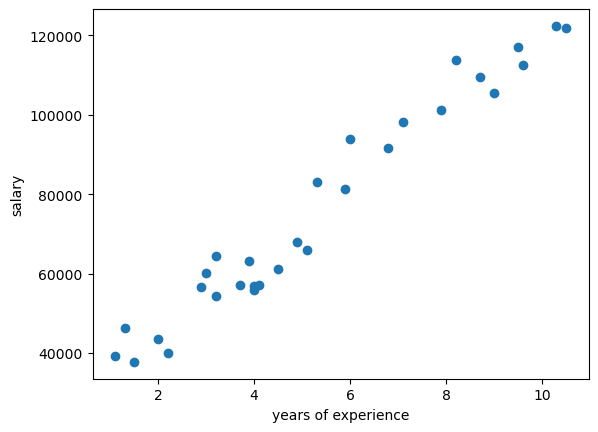

In [13]:
plt.scatter(salary_data['YearsExperience'],salary_data['Salary'])
plt.xlabel('years of experience')
plt.ylabel('salary')

## 4. Selecting the Features and Splitting the Data

In [15]:
#Define the feature (independent variable) and the target (dependent variable)

#X must be 2D even if we have one feature
X = salary_data.iloc[:,0].values
y = salary_data.iloc[:,-1].values

In [17]:
#Reshaping X
X = X.reshape(-1, 1)
print(X.shape)

(30, 1)


In [19]:
#Split the data into training and testing sets (80% train, 20% test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (24, 1)
Testing set size: (6, 1)


In [21]:
#Scaling the values before training 
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1,1)).flatten()

Text(0, 0.5, 'salary')

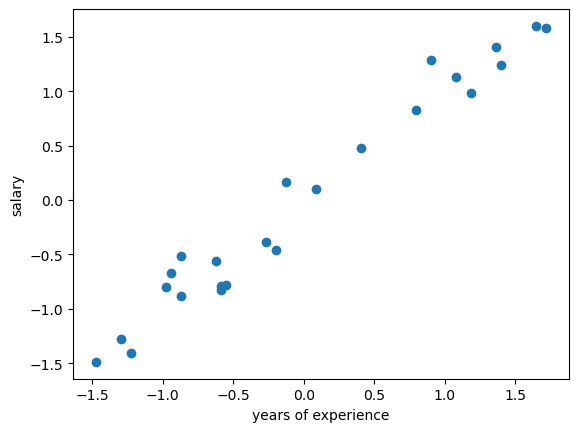

In [23]:
#Visualizing the relationship after scaling
plt.scatter(X_train_scaled,y_train_scaled)
plt.xlabel('years of experience')
plt.ylabel('salary')

## 5. Train the Simple Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

#Sets rules for linear regression
model =LinearRegression()

In [27]:
#Train the model on the training data 
#(model learns the relationship between x and y)
#The model now contains slope(s), intercept and learned patterns from training data

model.fit(X_train_scaled, y_train_scaled)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: -8.768524495978613e-17
Coefficient: [0.98258606]


## 6. Make Predictions

In [30]:
#Predict the Salaries for the rest of the set

y_pred = model.predict(X_test_scaled)
y_pred

array([-1.52064487, -1.59049267, -0.40308003, -0.68247124,  0.50494141,
        0.12077849])

In [32]:
#Display the first few predictions alongside the actual values

y_pred = model.predict(X_test_scaled)
predictions = pd.DataFrame({'Actual': y_test_scaled, 'Predicted': y_pred})
print(predictions.head())

     Actual  Predicted
0 -1.178640  -1.520645
1 -1.429066  -1.590493
2 -0.634650  -0.403080
3 -0.777782  -0.682471
4  0.721565   0.504941


## 7. Visualize the Regression line

- You want to visualize the model you trained.
- Shows the relationship the model learned, even it hasn't been tested on new data yet.

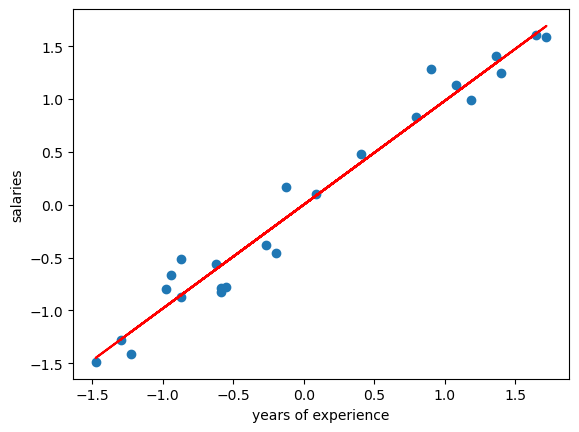

In [36]:
#Plot all the points 
plt.scatter(X_train_scaled, y_train_scaled)
plt.plot(X_train_scaled, model.predict(X_train_scaled), color='red')

#Add labels and titles
plt.xlabel('years of experience')
plt.ylabel('salaries')
plt.show()



- You have already trained the model.
- You want to evaluate performance on unseen data. (X_test, y_test)
- Purpose : Check how close your model's prediction  are to reality.

In [38]:
#Finding the best fit line (slope and the intercept)

slope = model.coef_
intercept = model.intercept_

print("Slope: ", slope)
print("Intercept: " , intercept)

Slope:  [0.98258606]
Intercept:  -8.768524495978613e-17


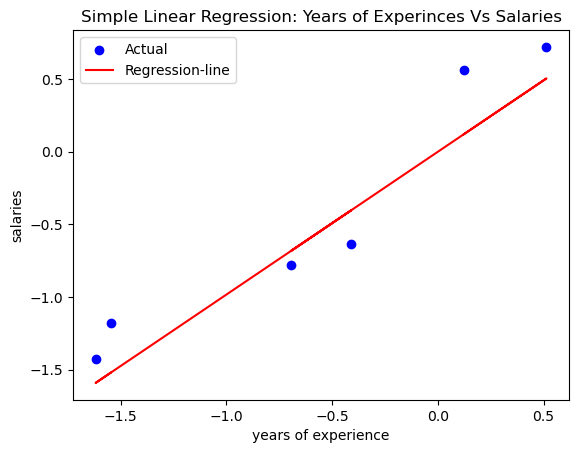

In [40]:
#Plot the actual data points
plt.scatter(X_test_scaled, y_test_scaled, color='blue', label='Actual')

#Plot the regresssion line 
plt.plot(X_test_scaled, y_pred, color='red', label='Regression-line')

#Add labels and titles
plt.xlabel('years of experience')
plt.ylabel('salaries')
plt.title('Simple Linear Regression: Years of Experinces Vs Salaries')
plt.legend()
plt.show()

In [139]:
"""
PS: For real predictions, remember to inverse-transform back to original units
using scaler_y.inverse_transform()!
"""

'\nPS: For real predictions, remember to inverse-transform back to original units\nusing scaler_y.inverse_transform()!\n'